# Assessing Calibration Ranges of models
- This notebook shows how users can plot their data amonst the calibration range of different models to assess whether they are within the calibration range
- You can download the excel spreadsheet here: https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Other_features/Example_Liq_Px_Amp.xlsx

In [1]:
#!pip install Thermobar --upgrade

In [2]:
# First, load various python things. If you haven't installed Thermobar do so now
# by removing the # next to !pip install

#!pip install Thermobar
import Thermobar as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pt.__version__

'1.0.40'

## Step 1: Load in data from your system 
- in this case some pyroxene, amphibole and liquid data. 

In [3]:
out=pt.import_excel('Example_Liq_Px_Amp.xlsx', sheet_name="Liquid")
Liquids1=out['Liqs']

out2=pt.import_excel('Example_Liq_Px_Amp.xlsx', sheet_name="Pyroxene")
Cpxs1=out2['Cpxs']

out3=pt.import_excel('Example_Liq_Px_Amp.xlsx', sheet_name="Amphibole")
Amps1=out3['Amps']

c:\Users\penny\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


## Step 2: The two ways to use these functions
- You have two options, you can either use the function "return_cali_dataset" which will return the calibration dataset of each model so you can make whatever plots you want. 
- Or, you can use the prebuilt plotting function "generic_cali_plot" which allows you to specify a model, and an x and y paramter, and will make the plot for you.
- You can see the different options using the help function
- We will add as many calibratoin datasets as we can find - if you have one, please reach out! So far, the supported ones are listed here under "model" for each phase

In [4]:
help(pt.generic_cali_plot)

Help on function generic_cali_plot in module Thermobar.calibration_plots:

generic_cali_plot(df, model=None, x=None, y=None, P_kbar=None, T_K=None, figsize=(7, 5), shape_cali='o', mfc_cali='white', mec_cali='k', ms_cali=5, shape_data='^', mfc_data='red', alpha_cali=1, alpha_data=1, mec_data='k', ms_data=10, order='cali bottom', save_fig=False, fig_name=None, dpi=200)
    This function plots your compositions amongst the calibration dataset for a variety of models where we could
    obtain the exact calibration dataset. see model for option.
    
    Parameters
    -------
    
    df: pandas DataFrame
        dataframe of your compositions, e.g. a dataframe of Cpx composition
    
    x and y: str
        What you want to plotted against each other. E.g. x="SiO2_Cpx", y="Al2O3_Cpx"
    
    model: str
        AMPHIBOLE:
        Ridolfi2021:  Ridolfi et al. (2012)
        Putirka2016:  Putirka (2016)
        Mutch2016: Mutch et al. (2016)
        Zhang2017: Zhang et al. (2017)
    
    

## Example 1 - Amphibole

#### Example 1a- First, lets use the prebuilt plot functions

Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\Mutch_Cali_input.csv


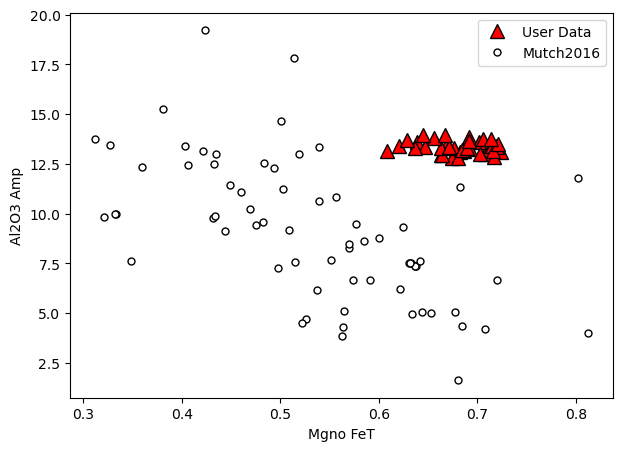

In [6]:
## Example in manuscript - v simple
a=pt.generic_cali_plot(df=Amps1, model="Mutch2016",
        x='Mgno_FeT', y='Al2O3_Amp')
a.savefig('Cali_plot_amphibole.png', dpi=200)

Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\Mutch_Cali_input.csv


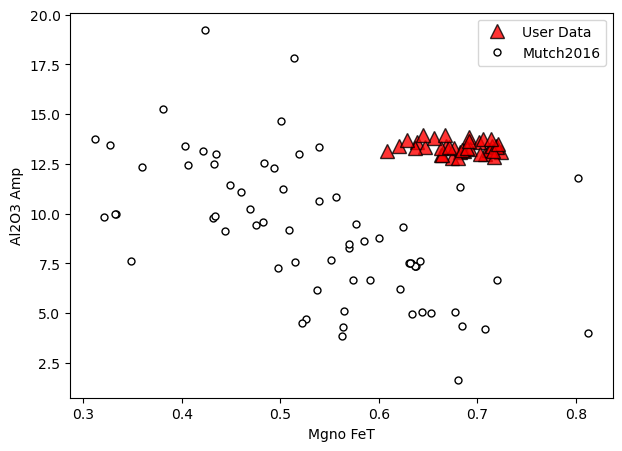

In [7]:
# Here we specify we want mutch, that we want calibration data 
# on the bottom, and alpha (Transparency) at 80% for our data
a=pt.generic_cali_plot(df=Amps1, model="Mutch2016",
        x='Mgno_FeT', y='Al2O3_Amp',  order="cali bottom", 
                       alpha_cali=1, alpha_data=0.8)

### Here we specify we want mutch, that we want calibration data on the bottom, and alpha (Transparency) at 80% for our data

Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\Ridolfi_Cali_input.csv


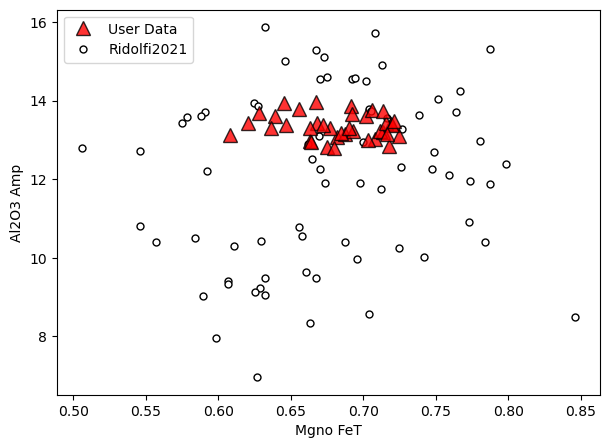

In [8]:
a=pt.generic_cali_plot(df=Amps1, model="Ridolfi2021",
        x='Mgno_FeT', y='Al2O3_Amp',  order="cali bottom", 
                       alpha_cali=1, alpha_data=0.8)

## Perhaps we want to compare the liquids to a KD model

Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\Shea2022_Cali_input.csv


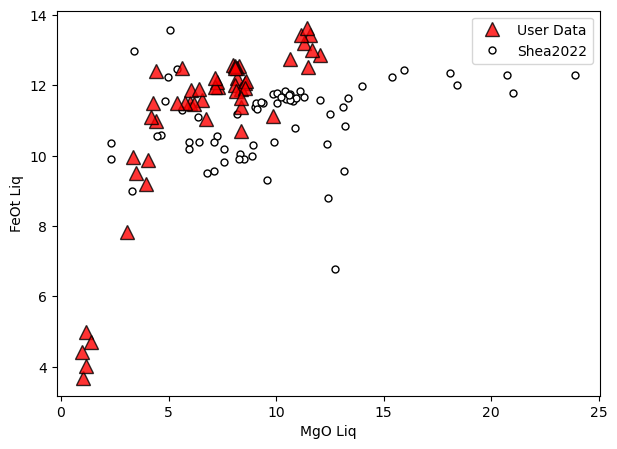

In [30]:
a=pt.generic_cali_plot(df=Liquids1, model="Shea2022",
        x='MgO_Liq', y='FeOt_Liq',  order="cali bottom", 
                       alpha_cali=1, alpha_data=0.8)

#### Example 1b: lets load the calibration datasets for Mutch and Ridolfi

In [9]:
Cali_Dataset_Mutch=pt.return_cali_dataset(model="Mutch2016")
Cali_Dataset_Ridolfi=pt.return_cali_dataset(model="Ridolfi2021")

Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\Mutch_Cali_input.csv
Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\Ridolfi_Cali_input.csv


- Now we can use matplotlib to make whatever plot we want

Text(0, 0.5, 'MgO Amp')

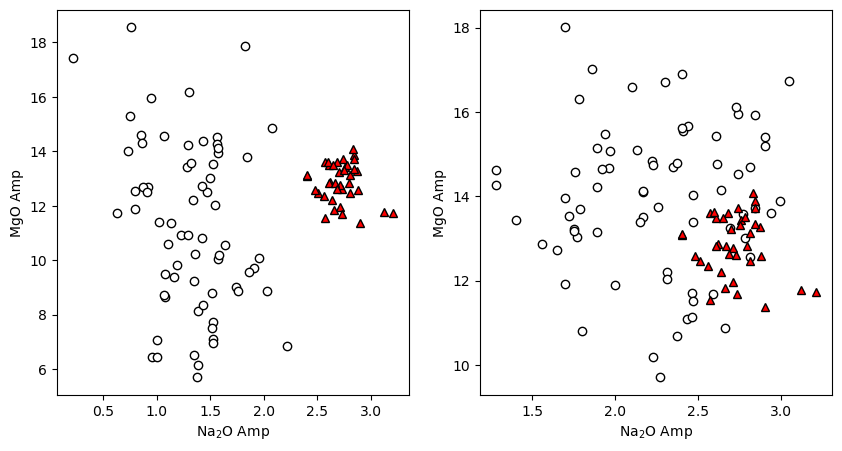

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Cali_Dataset_Mutch['Na2O_Amp'], Cali_Dataset_Mutch['MgO_Amp'], 
         'ok', mfc='white')
ax1.plot(Amps1['Na2O_Amp'], Amps1['MgO_Amp'], '^k', mfc='red')
ax1.set_xlabel('Na$_2$O Amp')
ax1.set_ylabel('MgO Amp')


ax2.plot(Cali_Dataset_Ridolfi['Na2O_Amp'], Cali_Dataset_Ridolfi['MgO_Amp'], 
         'ok', mfc='white')
ax2.plot(Amps1['Na2O_Amp'], Amps1['MgO_Amp'], '^k', mfc='red')
ax2.set_xlabel('Na$_2$O Amp')
ax2.set_ylabel('MgO Amp')

#### Example 1c - What if we want to compare pressures and temperatures to the cali dataset?
- First, we need to calculate the P and Ts using the equations. 

In [11]:
P_Mutch=pt.calculate_amp_only_press(amp_comps=Amps1, equationP="P_Mutch2016")
P_Ridolfi=pt.calculate_amp_only_press_temp(amp_comps=Amps1, 
                                           equationP="P_Ridolfi2021",
                                          equationT="T_Ridolfi2012")

In [12]:
P_Ridolfi.head()

,P_kbar_calc,T_K_calc,Input_Check,Fail Msg,classification,equation,SiO2_Amp,TiO2_Amp,Al2O3_Amp,FeOt_Amp,MnO_Amp,MgO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,Cr2O3_Amp,F_Amp,Cl_Amp,Sample_ID_Amp
0,4.922720,1301.307668,True,,kaersutite,(1b+1c)/2,40.46,5.96,12.97,11.18,0.1201,12.35,11.54,2.56,1.1721,0.0093,0.0,0.0,Lava_1_amph-2_
1,5.751972,1337.114450,True,,kaersutite,1a,40.85,6.14,13.08,10.70,0.2122,12.88,11.35,2.62,0.8556,0.0069,0.0,0.0,Lava_1-8_
2,9.288183,1344.043447,True,,kaersutite,1e,40.76,5.54,13.13,13.08,0.1802,11.38,11.38,2.90,0.8943,0.0022,0.0,0.0,Lava_1-16_
3,7.976460,1335.292103,True,,kaersutite,1d,40.62,5.60,13.42,11.16,0.1066,12.61,11.57,2.73,0.9961,0.0000,0.0,0.0,Lava_1-20_
4,8.048350,1333.351123,True,,kaersutite,1d,39.99,5.49,13.60,12.03,0.1600,11.96,11.56,2.71,1.0031,0.0092,0.0,0.0,Lava_1-24_


- Now we can use the generic plot function to add the P_kbar onto the dataframe

Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\Ridolfi_Cali_input.csv


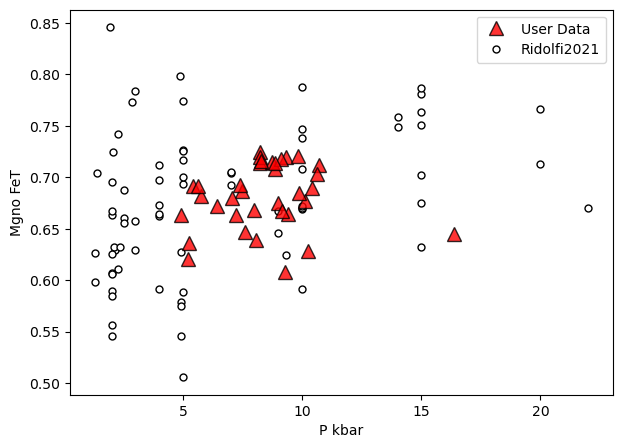

In [13]:
a=pt.generic_cali_plot(df=Amps1, model="Ridolfi2021",
        x='P_kbar', y='Mgno_FeT', P_kbar=P_Ridolfi['P_kbar_calc'],
                       order="cali bottom", 
                       alpha_cali=1, alpha_data=0.8)

- Or, for Ridolfi, plot pressure and temperature

Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\Ridolfi_Cali_input.csv


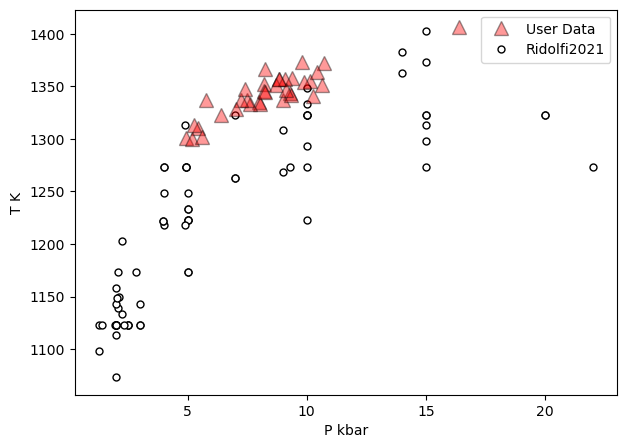

In [14]:
a=pt.generic_cali_plot(df=Amps1, model="Ridolfi2021",
        x='P_kbar', y='T_K', P_kbar=P_Ridolfi['P_kbar_calc'],
                       T_K=P_Ridolfi['T_K_calc'],
                       order="cali bottom", 
                       alpha_cali=1, alpha_data=0.4)

Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\Mutch_Cali_input.csv


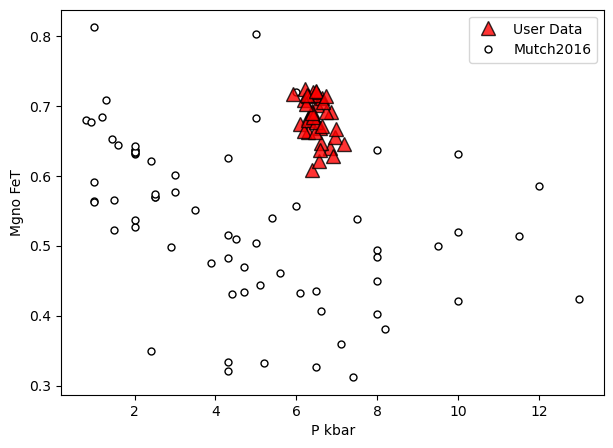

In [15]:
a=pt.generic_cali_plot(df=Amps1, model="Mutch2016",
        x='P_kbar', y='Mgno_FeT', P_kbar=P_Mutch['P_kbar_calc'],
                       order="cali bottom", 
                       alpha_cali=1, alpha_data=0.8)

## Example 2 - Cpx

#### Example 2a: Loading the various calibration datasets, making plots using mpl

In [16]:
Rid_Cali=pt.return_cali_dataset(model='Ridolfi2021')
Rid_Cali.head()

Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\Ridolfi_Cali_input.csv


,Unnamed: 0,Reference,spot/exp.,T,P,H2O_Liq,∆NNO,logfO2,Unnamed: 7,SiO2_Amp,...,Total,Fail Msg,Input_Check,Mgno_Fe2,Mgno_FeT,Na_calc,B_Sum,A_Sum,class,classification
0,0,Adam & Green (1994),1446,1050,1500.0,NaN,NaN,NaN,NaN,42.43,...,NaN,NaN,True,0.868273,0.780512,0.258108,2.0,0.717443,NaN,Mg-hastingsite
1,1,Adam & Green (1994),1447,1050,1000.0,NaN,NaN,NaN,NaN,41.19,...,NaN,NaN,True,0.885676,0.747414,0.194505,2.0,0.757125,NaN,Mg-hastingsite
2,2,Gardner et al. (1995),G-14b,850,250.0,6.3,1.191313,-11.594939,NaN,45.69,...,NaN,NaN,True,0.899146,0.660164,0.363048,2.0,0.165110,NaN,Mg-Hornblende
3,3,Gardner et al. (1995),G-15a,850,250.0,5.7,1.190000,-11.596251,NaN,45.56,...,NaN,NaN,True,0.918743,0.687599,0.328591,2.0,0.234784,NaN,Tschermakitic pargasite
4,4,Gardner et al. (1995),G-14a,850,250.0,7.0,0.986417,-11.799834,NaN,45.65,...,NaN,NaN,True,0.872857,0.655715,0.363498,2.0,0.202943,NaN,Tschermakitic pargasite


In [17]:
Brugman_Cali=pt.return_cali_dataset(model='Brugman2019')
Petrelli_Cali=pt.return_cali_dataset(model='Petrelli2020')
Neave_Cali=pt.return_cali_dataset(model='Neave2017')
Masotta_Cali=pt.return_cali_dataset(model='Masotta2013')
# And calculate Cpx components for loaded cpx
input_cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=Cpxs1)

Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\Brugman_2019_Cali_input.csv
Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\Petrelli20_Cali_input.csv
Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\NeavePutirka_2017_Cali_input.csv
Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\Masotta_2013_Cali_input.csv


Text(0, 0.5, 'T_K')

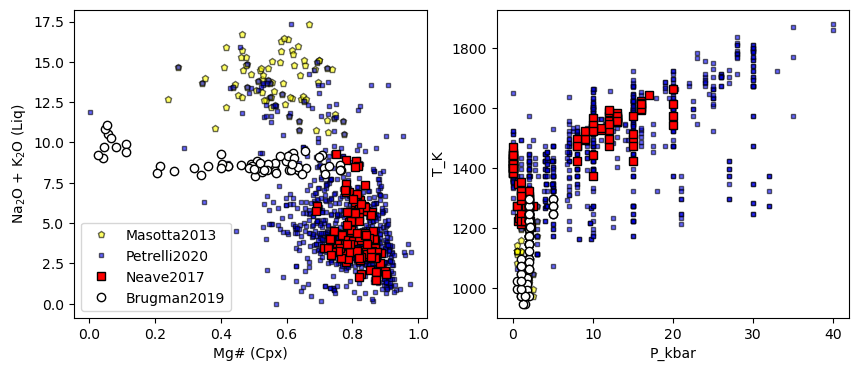

In [18]:
## Lets have a look at these
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Masotta_Cali['Mgno_Cpx'], 
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=5, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'], 
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.6, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'], 
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', label='Neave2017')

ax1.plot(Brugman_Cali['Mgno_Cpx'], 
         Brugman_Cali['Na2O_Liq']+Brugman_Cali['K2O_Liq'],
         'ok', mfc='white', label='Brugman2019')
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')

y2='T_K'
x2='P_kbar'

ax2.plot(Masotta_Cali[x2], 
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=5, alpha=0.6, label='Masotta2013')

ax2.plot(Petrelli_Cali[x2], 
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, alpha=0.6, label='Petrelli2020')

ax2.plot(Neave_Cali[x2], 
         Neave_Cali[y2],
         'sk', mfc='red', label='Neave2017')

ax2.plot(Brugman_Cali[x2], 
         Brugman_Cali[y2],
         'ok', mfc='white', label='Brugman2019')

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)

#### Example 2b: Using built in functions for plotting

Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\NeavePutirka_2017_Cali_input.csv


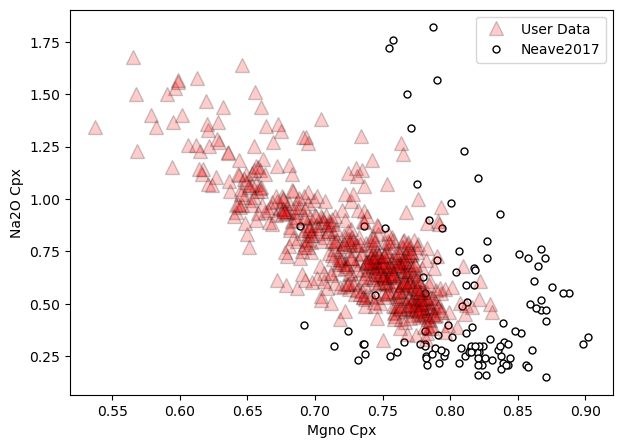

In [19]:
a=pt.generic_cali_plot(df=Cpxs1, model="Neave2017",
        x='Mgno_Cpx', y='Na2O_Cpx',
                       order="cali bottom", 
                       alpha_cali=1, alpha_data=0.2)

- Lets say calculate P and T, then make plots with that

In [20]:
PT_Pet20=pt.calculate_cpx_only_press_temp(cpx_comps=Cpxs1, equationP="P_Petrelli2020_Cpx_only",
                                            equationT="T_Petrelli2020_Cpx_only")

Youve selected a P-independent function
Youve selected a T-independent function


Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\Petrelli20_Cali_input.csv


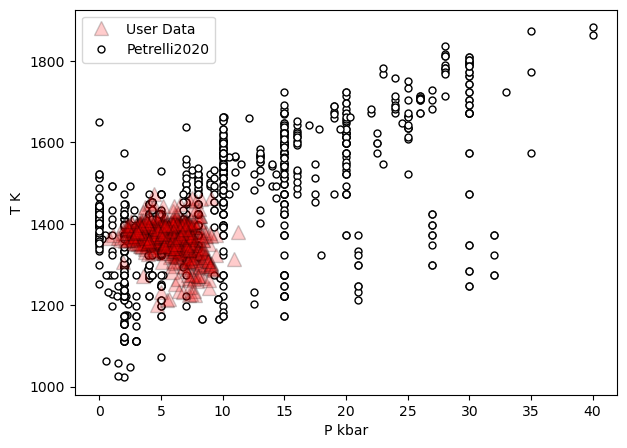

In [21]:
a=pt.generic_cali_plot(df=Cpxs1, model="Petrelli2020",
        x='P_kbar', y='T_K', P_kbar=PT_Pet20['P_kbar_calc'],
                       T_K=PT_Pet20['T_K_calc'],
                       order="cali bottom", 
                       alpha_cali=1, alpha_data=0.2)

## Example 3 - Assessing matched liquid - Cpx pairs

In [22]:
# First, lets calculate matched Cpx-Liq pairs. 
cpx_liq_out=pt.calculate_cpx_liq_press_temp_matching(cpx_comps=Cpxs1, liq_comps=Liquids1, 
                                                     equationT="T_Mas2013_Talk2012",
                                                     equationP="P_Mas2013_Palk2012")
all_matches=cpx_liq_out['All_PTs']
av_matches=cpx_liq_out['Av_PTs']

Considering N=574 Cpx & N=51 Liqs, which is a total of N=29274 Liq-Cpx pairs, be patient if this is >>1 million!
Youve selected a P-independent function
Youve selected a P-independent function
2207 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1244 Cpx-Liq matches using the specified filter. N=358 Cpx out of the N=574 Cpx that you input matched to 1 or more liquids


### Lets plot them ontop of the previous figures

Text(0, 0.5, 'T_K')

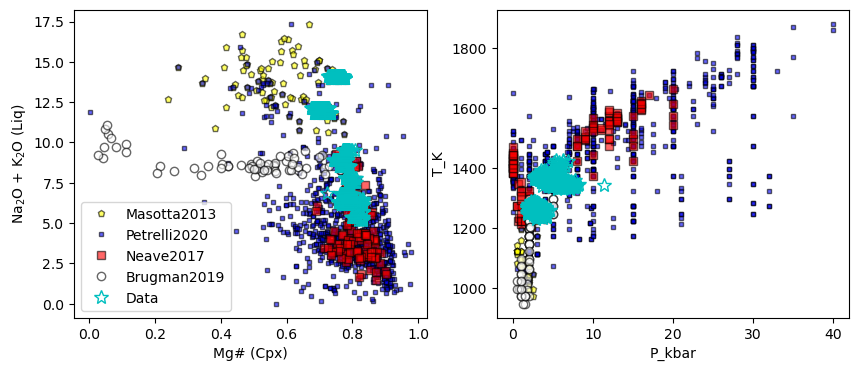

In [23]:
## Lets have a look at these
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Masotta_Cali['Mgno_Cpx'], 
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=5, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'], 
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.6, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'], 
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', label='Neave2017', alpha=0.6)

ax1.plot(Brugman_Cali['Mgno_Cpx'], 
         Brugman_Cali['Na2O_Liq']+Brugman_Cali['K2O_Liq'],
         'ok', mfc='white', label='Brugman2019', alpha=0.6)

ax1.plot(all_matches['Mgno_Cpx'],  all_matches['Na2O_Liq']+all_matches['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')

y2='T_K'
x2='P_kbar'

ax2.plot(Masotta_Cali[x2], 
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=5,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2], 
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.6)

ax2.plot(Neave_Cali[x2], 
         Neave_Cali[y2],
         'sk', mfc='red', label='Neave2017', alpha=0.6)

ax2.plot(Brugman_Cali[x2], 
         Brugman_Cali[y2],
         'ok', mfc='white', label='Brugman2019', alpha=0.6)

ax2.plot( all_matches['P_kbar_calc'],all_matches['T_K_calc'], 
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)

### Or you can plot on little diagram

Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\Petrelli20_Cali_input.csv


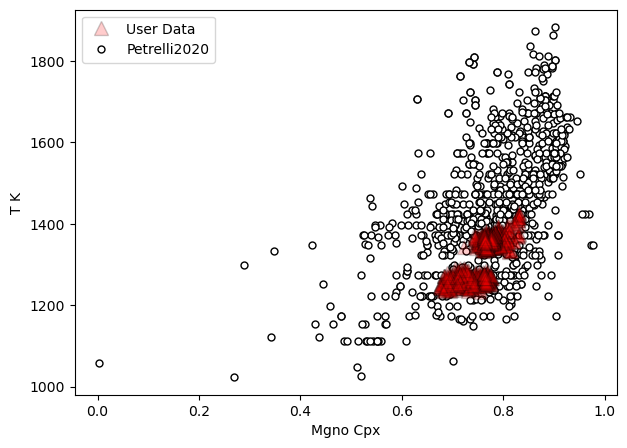

In [24]:
a=pt.generic_cali_plot(df=all_matches, model="Petrelli2020",
        x='Mgno_Cpx', y='T_K', P_kbar=all_matches['P_kbar_calc'],
                       T_K=all_matches['T_K_calc'],
                       order="cali bottom", 
                       alpha_cali=1, alpha_data=0.2)

Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\Masotta_2013_Cali_input.csv


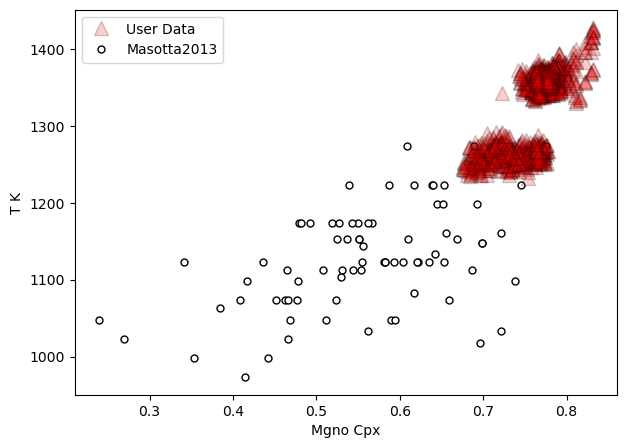

In [25]:
a=pt.generic_cali_plot(df=all_matches, model="Masotta2013",
        x='Mgno_Cpx', y='T_K', 
        T_K=all_matches['T_K_calc'],
        order="cali bottom", 
        alpha_cali=1, alpha_data=0.2)